## Hough圆环变换

使用护肤变换在图像中找到圆形。

由于必须至少3个参数才能确定一个圆（圆心坐标以及半径），因此圆形活肤变换的累加器必须是3维的，这样计算效率很低，opencv中采取霍夫梯度，使用便捷的梯度寻找圆形。

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

`cv2.HoughCircles(image, method, dp, minDist, circles, param1, param2, minRadius, maxRadius)`

+ image:输入图像，需要灰度图
+ method:检测方法,常用`cv2.HOUGH_GRADIENT`
+ dp:检测内侧圆心的累加器图像的分辨率于输入图像之比的倒数，如dp=1，累加器和输入图像具有相同的分辨率，如果dp=2，累计器便有输入图像一半那么大的宽度和高度
+ minDist:表示两个圆之间圆心的最小距离
+ param1:默认值100，它是method设置的检测方法的对应的参数，对当前唯一的方法霍夫梯度法cv2.HOUGH_GRADIENT，它表示传递给canny边缘检测算子的高阈值，而低阈值为高阈值的一半
+ param2:默认值100，它是method设置的检测方法的对应的参数，对当前唯一的方法霍夫梯度法cv2.HOUGH_GRADIENT，它表示在检测阶段圆心的累加器阈值，它越小，就越可以检测到更多根本不存在的圆，而它越大的话，能通过检测的圆就更加接近完美的圆形了
+ minRadius:默认值0，圆半径的最小值
+ maxRadius:默认值0，圆半径的最大值

[111.5  52.5  41.6]
[163.5 140.5  19.2]
[ 61.5 140.5  19.9]
[164.5 143.5  38.6]
[ 59.5 138.5  40.2]
[166.5 142.5  38.6]


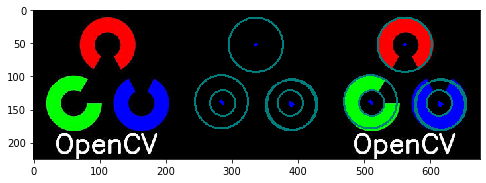

In [26]:
img = cv2.imread('./imgdata/opencv_black.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_rgb_copy = img_rgb.copy()

img = cv2.medianBlur(img, 5)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(image=img, 
                           method=cv2.HOUGH_GRADIENT, 
                           dp=1, 
                           minDist=1, 
                           param1=50, 
                           param2=45, 
                           minRadius=0, 
                           maxRadius=0)

fig = np.zeros(img_rgb.shape, dtype=np.uint8)
for circle in circles[0]:
    print(circle)
    center_x, center_y, radius = circle
    # draw circle
    cv2.circle(fig, (center_x, center_y), radius, (0, 125, 125), 2)
    # draw center
    cv2.circle(fig, (center_x, center_y), 1, (0, 0, 255), 3)
    
    cv2.circle(img_rgb_copy, (center_x, center_y), radius, (0, 125, 125), 2)
    # draw center
    cv2.circle(img_rgb_copy, (center_x, center_y), 1, (0, 0, 255), 3)
    
    

img_rgb = np.hstack((img_rgb, fig, img_rgb_copy))
plt.figure(figsize=[8, 8])
plt.imshow(img_rgb, cmap='gray')
plt.show()

In [27]:
circles.shape

(1, 6, 3)